In [500]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [501]:
data = pd.read_csv(".\dataset\iris.data")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [502]:
data.shape

(150, 5)

In [475]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [503]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


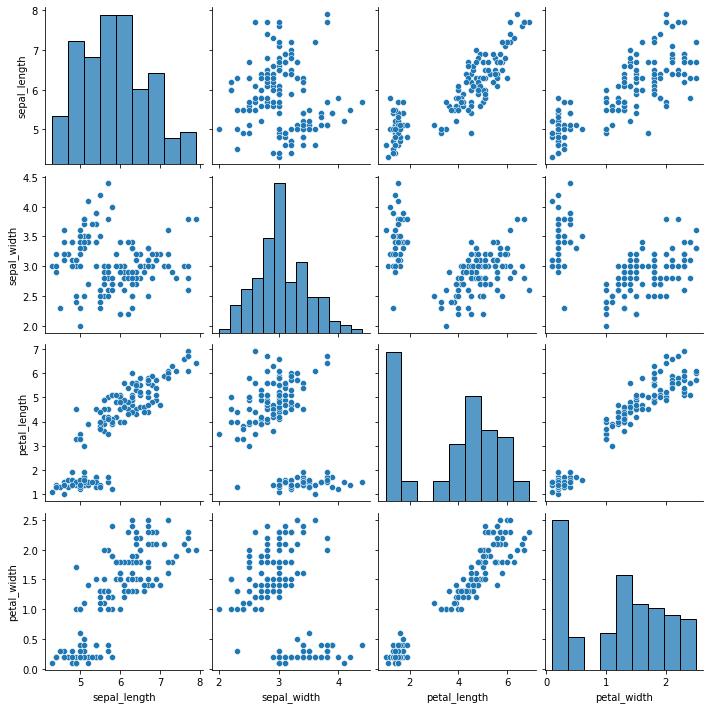

In [504]:
sns.pairplot(data)

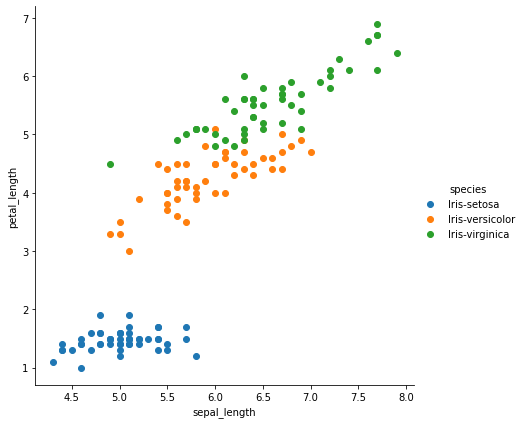

In [505]:
sns.FacetGrid(data, hue ="species",  height = 6).map(plt.scatter,  'sepal_length',  'petal_length').add_legend()

<AxesSubplot:xlabel='species', ylabel='count'>

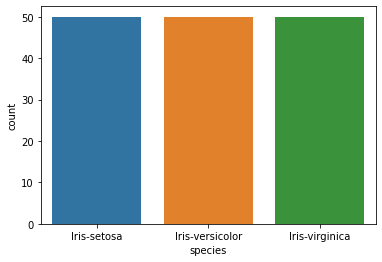

In [507]:
sns.countplot('species',data=data)

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

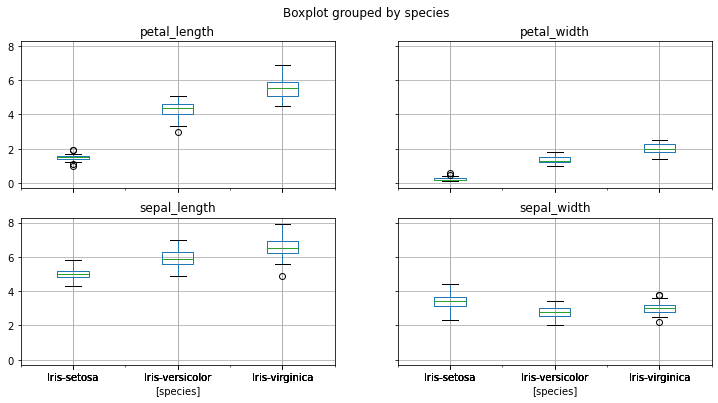

In [511]:
data.boxplot(by="species", figsize=(12, 6))

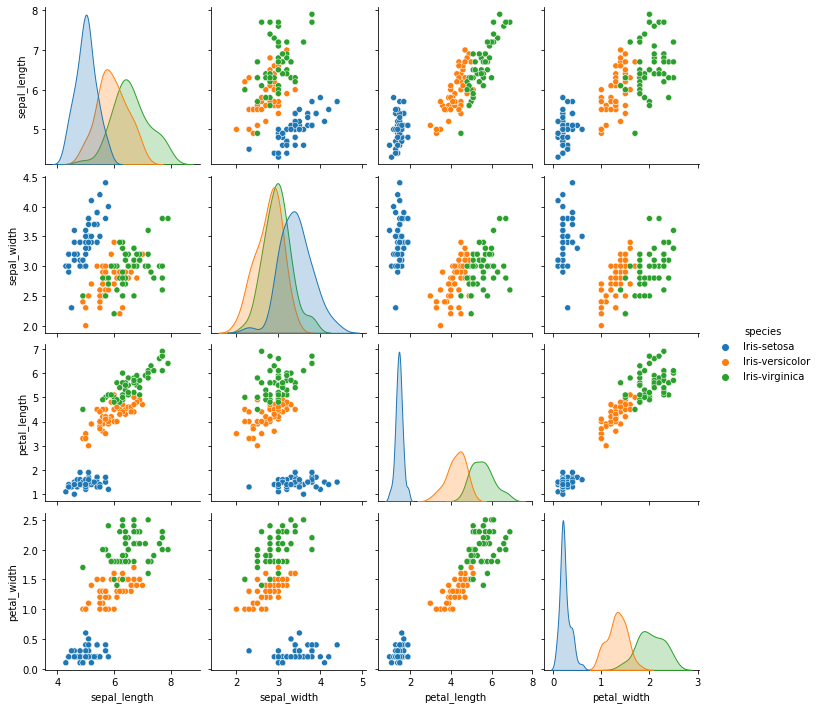

In [512]:
sns.pairplot(data,hue='species')

In [477]:
enc = LabelEncoder()
data.iloc[:,-1] = enc.fit_transform(data.iloc[:,-1])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [478]:
x = data.iloc[:,:4]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [479]:
y = data.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [480]:
x_tarin,x_test,y_tarin,y_test = train_test_split(x,y,random_state=0)
print(x_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [481]:
ks = 21
mean_acc = np.zeros((ks-1))

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_tarin,y_tarin)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test,yhat)

In [482]:
print("The best accuracy was with ",mean_acc.max(),"with k=",mean_acc.argmax())

The best accuracy was with  0.9736842105263158 with k= 0


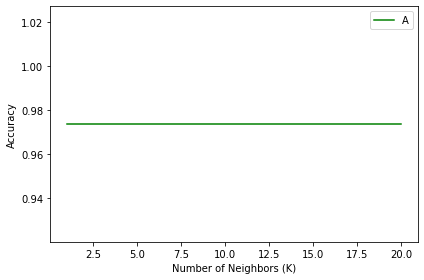

In [483]:
plt.plot(range(1,ks),mean_acc,'g')
plt.legend('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [484]:
knnmodel = KNeighborsClassifier(n_neighbors=15)
knnmodel.fit(x_tarin,y_tarin)
y_predict = knnmodel.predict(x_test)

In [485]:
acc = accuracy_score(y_test,y_predict)
round(acc*100,1)

97.4

In [486]:
cm = confusion_matrix(y_test.values,y_predict)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [487]:
cm = pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,15,1
virginica,0,0,9


In [488]:
prediction_output = pd.DataFrame(data=[y_test.values,y_predict],index=['y_test','y_predict'])
prediction_output.transpose()[0:4]

,y_test,y_predict
0,2,2
1,1,1
2,0,0
3,2,2


In [489]:
prediction_output.iloc[0,:].value_counts()

1    16
0    13
2     9
Name: y_test, dtype: int64

In [513]:
key = ['setosa','versicolor','virginica']

In [515]:
test = np.array([[5.7,2.5,5.0,2.0]])
r = knnmodel.predict(test)
print(key[r[0]])

virginica


In [516]:
test = np.array([[6.1,3.0,4.6,1.4]])
r = knnmodel.predict(test)
print(key[r[0]])

versicolor


In [517]:
test = np.array([[5.0,3.5,1.6,0.6]])
r = knnmodel.predict(test)
print(key[r[0]])

setosa


In [494]:
joblib.dump(knnmodel,'iris.ml')

['iris.ml']